In [ ]:
# import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# import dataset

df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
# melihat missing values

df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# melihat jumlah missing values dan persentasenya dari tiap kolom

total_miss = df.isnull().sum().sort_values(ascending=False)
percent_miss = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
missing_data = pd.concat([total_miss, percent_miss], axis=1, keys=['Total', 'Percent'])

missing_data.head()

,Total,Percent
CustomerID,135080,24.926694
Description,1454,0.268311
InvoiceNo,0,0.000000
StockCode,0,0.000000
Quantity,0,0.000000


* Terdapat 2 feature yang missing values
* Untuk Customer ID karena menjadi penentu customer yang akan di segmentasi, jadi data yang null dihapus.

In [ ]:
# menghapus missing values

df.dropna(how='any', subset=['CustomerID'], inplace=True)

df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
# melihat statistika deskriptif dari kolom Quantity dan UnitPrice

df[['Quantity','UnitPrice']].describe()

,Quantity,UnitPrice
count,406829.000000,406829.000000
mean,12.061303,3.460471
std,248.693370,69.315162
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


In [ ]:
# cek anomali data

quantity_zero = len(df[df['Quantity'] <= 0])
perc_quantity_zero = round((len(df[df['Quantity'] <= 0]) / len(df)) * 100, ndigits=2)
unitprice_zero = len(df[df['UnitPrice'] <= 0])
perc_unitprice_zero = round((len(df[df['UnitPrice'] <= 0]) / len(df)) * 100, ndigits=2)

print('Quantity : Terdapat ', quantity_zero, ' data yang kurang dari 0. Dengan persentase ', perc_quantity_zero, '% dari keseluruhan data')
print('UnitPrice : Terdapat ', unitprice_zero, ' data yang kurang dari 0. Dengan persentase ', perc_unitprice_zero, '% dari keseluruhan data')

Quantity : Terdapat  8905  data yang kurang dari 0. Dengan persentase  2.19 % dari keseluruhan data
UnitPrice : Terdapat  40  data yang kurang dari 0. Dengan persentase  0.01 % dari keseluruhan data


In [ ]:
# remove anomaly

df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

df[['Quantity','UnitPrice']].describe()

,Quantity,UnitPrice
count,397884.000000,397884.000000
mean,12.988238,3.116488
std,179.331775,22.097877
min,1.000000,0.001000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,8142.750000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [ ]:
# cek uniq value

df[['InvoiceNo','StockCode','CustomerID','Country']].nunique()

InvoiceNo     18532
StockCode      3665
CustomerID     4338
Country          37
dtype: int64

Terdapat 18532 pembelian dari 3665 jenis barang dan 4338 customers dari 37 negara berbeda.

In [ ]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

In [ ]:
# melihat perbandingan asal customer dari UK dan negara lain (dalam persen)

df['country_uk'] = df['Country'].apply(lambda x: 'uk' if x == 'United Kingdom' else 'non uk')

print(round(df['country_uk'].value_counts()/len(df), ndigits=4)*100)

uk        89.05
non uk    10.95
Name: country_uk, dtype: float64


In [ ]:
# membuat feature baru dan mengubah kolom InvoiceDate menjadi date time

df['TotalAmount'] = df['Quantity'] * df['UnitPrice'] 
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,country_uk,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,uk,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,uk,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,uk,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,uk,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,uk,20.34


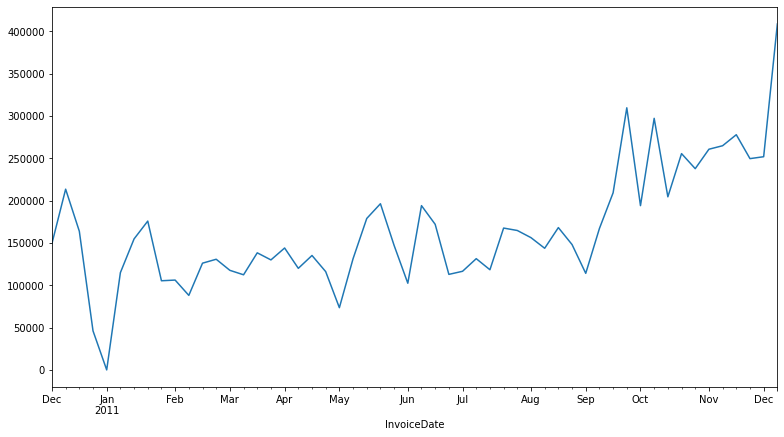

In [ ]:
# melihat tren pembelian mingguan

weekly_purchasements = df.copy()

weekly_purchasements.groupby(by= pd.Grouper(key='InvoiceDate', freq='1W'))['TotalAmount'].sum().plot.line(figsize=(13,7))

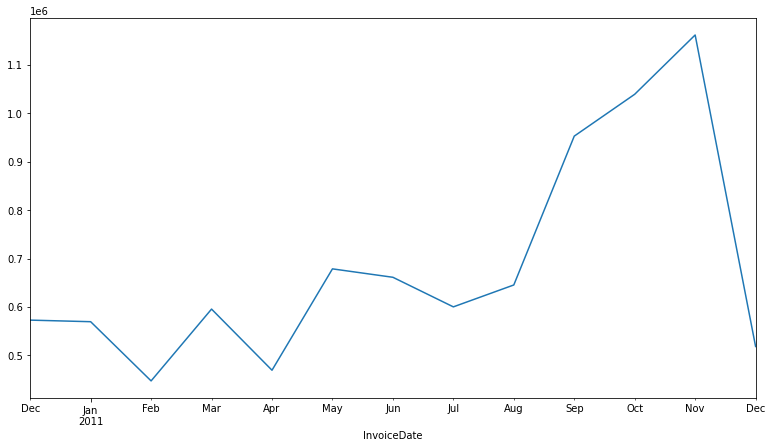

In [ ]:
# melihat tren pembelian bulanan

weekly_purchasements.groupby(by= pd.Grouper(key='InvoiceDate', freq='1M'))['TotalAmount'].sum().plot.line(figsize=(13,7))

# RFM (Recency, Frequency, and Monetary)

In [ ]:
recency = df.groupby('CustomerID')['InvoiceDate'].max()
recency = max(recency) - recency
recency = recency.dt.days
recency = recency.rename('Recency')

recency.head()

CustomerID
12346.0    325
12347.0      1
12348.0     74
12349.0     18
12350.0    309
Name: Recency, dtype: int64

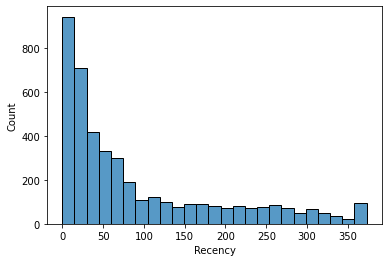

In [ ]:
# melihat histogram dari recency

sns.histplot(data=recency)

In [ ]:
# menghitung frequency

frequency = df.groupby('CustomerID')['InvoiceNo'].count()
frequency = frequency.rename('Frequency')

frequency.head()

CustomerID
12346.0      1
12347.0    182
12348.0     31
12349.0     73
12350.0     17
Name: Frequency, dtype: int64

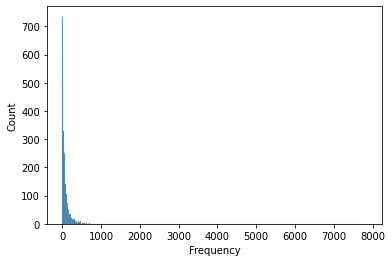

In [ ]:
# melihat histogram dari frequency

sns.histplot(data=frequency)

In [ ]:
# menghitung monetary

monetary = df.groupby('CustomerID')['TotalAmount'].sum()
monetary = monetary.rename('Monetary')

monetary.head()

CustomerID
12346.0    77183.60
12347.0     4310.00
12348.0     1797.24
12349.0     1757.55
12350.0      334.40
Name: Monetary, dtype: float64

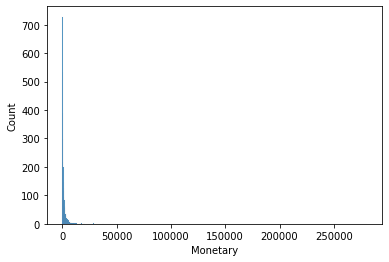

In [ ]:
# melihat histogram dari monetary

sns.histplot(data=monetary)

In [ ]:
# mendapatkan negara asal customer
country = df.groupby(['CustomerID', 'country_uk']).size().reset_index().drop(0, axis=1)

# merge 
df_new = country \
    .merge(recency, on='CustomerID')\
    .merge(frequency, on='CustomerID')\
    .merge(monetary, on='CustomerID')

# jadikan CustomerID index
df_new = df_new.set_index('CustomerID')

df_new.head()

,country_uk,Recency,Frequency,Monetary
CustomerID,,,,
12346.0,uk,325,1,77183.60
12347.0,non uk,1,182,4310.00
12348.0,non uk,74,31,1797.24
12349.0,non uk,18,73,1757.55
12350.0,non uk,309,17,334.40


In [ ]:
# ubah country_uk menjadi 1 untuk uk dan 0 non uk

df_new['country_uk'] = df_new['country_uk'].apply(lambda x : 1 if x == 'uk' else 0)

df_new.head()

,country_uk,Recency,Frequency,Monetary
CustomerID,,,,
12346.0,1,325,1,77183.60
12347.0,0,1,182,4310.00
12348.0,0,74,31,1797.24
12349.0,0,18,73,1757.55
12350.0,0,309,17,334.40


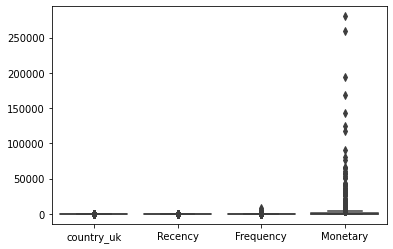

In [ ]:
sns.boxplot(data = df_new)

In [ ]:
# scalling data

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_new)

df_scaled = pd.DataFrame(df_scaled, columns = df_new.columns, index=df_new.index)
df_scaled.head()

,country_uk,Recency,Frequency,Monetary
CustomerID,,,,
12346.0,0.326547,2.334574,-0.396578,8.358668
12347.0,-3.062350,-0.905340,0.394649,0.250966
12348.0,-3.062350,-0.175360,-0.265435,-0.028596
12349.0,-3.062350,-0.735345,-0.081836,-0.033012
12350.0,-3.062350,2.174578,-0.326635,-0.191347


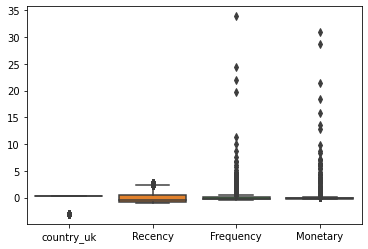

In [ ]:
sns.boxplot(data = df_scaled)

In [ ]:
# modelling 

possible_k = [2,3,4,5,6,7,8,9,10]
silhouette = []

for k in possible_k:
  kmeans = KMeans(n_clusters=k, random_state=123).fit(df_scaled)
  silhouette.append(silhouette_score(X = df_scaled, labels = kmeans.labels_))

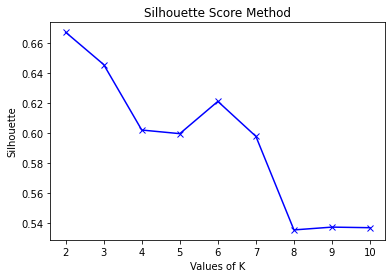

In [ ]:
plt.plot(possible_k, silhouette, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette')
plt.title('Silhouette Score Method')
plt.show()

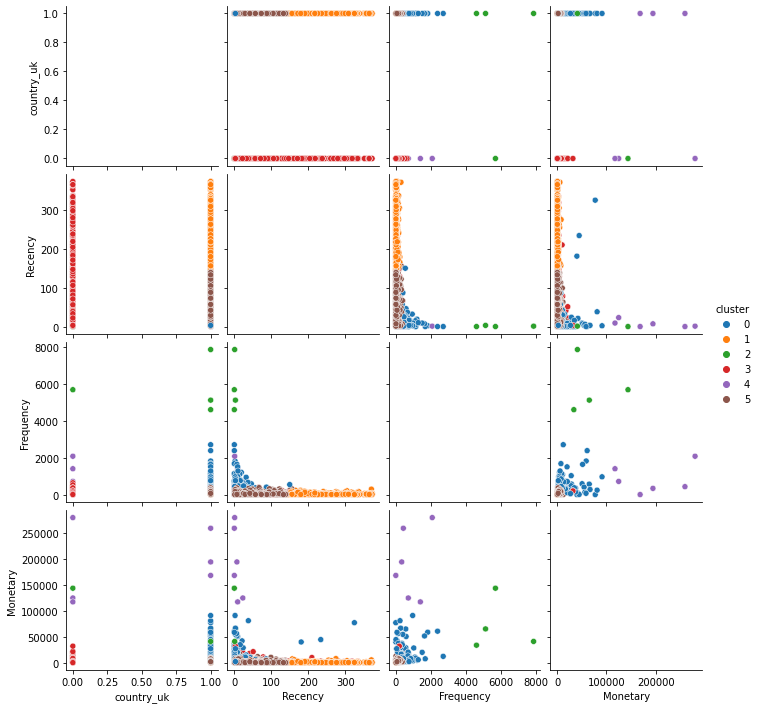

In [ ]:
# 6 Cluster

kmeans_6c = KMeans(n_clusters = 6, random_state=123).fit(df_scaled)

df_result_6c = df_new.copy()
df_result_6c['cluster'] = kmeans_6c.labels_

sns.pairplot(data=df_result_6c, hue='cluster', diag_kind='none', palette = 'tab10')

In [ ]:
# hasil dari cluster yang sudah dibuat

df_result_6c.head()

,country_uk,Recency,Frequency,Monetary,cluster
CustomerID,,,,,
12346.0,1,325,1,77183.60,0
12347.0,0,1,182,4310.00,3
12348.0,0,74,31,1797.24,3
12349.0,0,18,73,1757.55,3
12350.0,0,309,17,334.40,3


In [ ]:
# quantile function 
def q25(x):
  return x.quantile(0.25)

def q75(x):
  return x.quantile(0.75)

# simple descriptive statistic
df_result_6c \
  .drop('country_uk', axis=1)\
  .groupby('cluster')\
  .agg(['count','mean','std','min',q25,'median',q75,'max'])\
  .transpose()

cluster                      0            1              2             3  \
Recency   count     183.000000   958.000000       4.000000    414.000000   
          mean       15.234973   246.776618       1.000000     95.405797   
          std        35.305176    65.636727       1.414214    104.638705   
          min         0.000000   143.000000       0.000000      0.000000   
          q25         2.000000   189.000000       0.000000     18.000000   
          median      6.000000   242.000000       0.500000     52.000000   
          q75        16.000000   296.000000       1.500000    136.500000   
          max       325.000000   373.000000       3.000000    373.000000   
Frequency count     183.000000   958.000000       4.000000    414.000000   
          mean      535.360656    27.689979    5807.000000     81.396135   
          std       358.078267    32.176026    1429.730044     96.304061   
          min         1.000000     1.000000    4595.000000      1.000000   
          q25       367.000000     8.250000    4982.000000     21.250000   
          median    450.000000    18.000000    5393.000000     45.000000   
          q75       589.500000    33.000000    6218.000000    101.000000   
          max      2700.000000   297.000000    7847.000000    638.000000   
Monetary  count     183.000000   958.000000       4.000000    414.000000   
          mean    13085.065738   450.793070   70925.287500   2262.538913   
          std     16313.461152   610.367153   50424.336433   3479.689136   
          min      1093.650000     3.750000   33719.730000     51.560000   
          q25      4014.945000   163.225000   39173.610000    459.650000   
          median   6923.130000   305.515000   53078.180000   1025.700000   
          q75     13213.210000   505.542500   84829.857500   2659.962500   
          max     91062.380000  7832.470000  143825.060000  31906.820000   

cluster                       4             5  
Recency   count        6.000000   2773.000000  
          mean         6.666667     42.676884  
          std          8.869423     36.313016  
          min          0.000000      0.000000  
          q25          0.250000     14.000000  
          median       4.000000     31.000000  
          q75          8.500000     64.000000  
          max         23.000000    155.000000  
Frequency count        6.000000   2773.000000  
          mean       826.833333     76.270826  
          std        771.620481     74.030983  
          min          3.000000      1.000000  
          q25        360.500000     22.000000  
          median     572.500000     51.000000  
          q75       1228.500000    107.000000  
          max       2076.000000    385.000000  
Monetary  count        6.000000   2773.000000  
          mean    190863.461667   1341.293935  
          std      67791.993010   1592.871914  
          min     117379.630000      6.200000  
          q25     135804.022500    371.700000  
          median  181511.645000    795.120000  
          q75     243380.672500   1720.300000  
          max     280206.020000  17654.540000

point :
1. pada recency anggota terbanyak ada pada cluster 5 dan 1.
2. dimana cluster 1 jika dilihat dari nilai min dan max merupakan kelompok orang yang sudah lama tidak melakukan transaksi.
3. jika dilihat dari frequency, terlihat pada cluster 2 dimana pada cluster tersebut paling banyak melakukan transaksi dan secara partai banyak.
4. untuk monetary bisa terlihat pada cluster 4 merupakan orang-orang yang kemungkinan frequency pembeliannya tidak sebanyak cluster 2 namun dalam sekali pembelian untuk barang yang mahal.